In [1]:
import math
import itertools
import matplotlib.pyplot as plt

In [2]:
# Function to calculate the Euclidean distance between two points
def distance(p1, p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

# Function to calculate the perimeter of the triangle formed by points i, j, k
def perimeter(i, j, k, points):
    return distance(points[i], points[j]) + distance(points[j], points[k]) + distance(points[k], points[i])

# Dynamic programming function to find the minimum cost of triangulation
def min_cost_triangulation(points):
    n = len(points)
    dp = [[0 for _ in range(n)] for _ in range(n)]
    triangles = [[None for _ in range(n)] for _ in range(n)]  # To store the triangles

    # Build up from smaller sub-polygons
    for length in range(2, n):  # length is the size of the sub-polygon
        for i in range(n - length):
            j = i + length
            dp[i][j] = float('inf')  # initialize with infinity
            for k in range(i+1, j):  # choose vertex k to form a triangle
                cost = dp[i][k] + dp[k][j] + perimeter(i, j, k, points)
                if cost < dp[i][j]:
                    dp[i][j] = cost
                    triangles[i][j] = k

    result_triangles = []
    get_triangles(0, n-1, triangles, result_triangles)
    return dp[0][n-1], result_triangles

# Function to get the triangles from the dp table
def get_triangles(i, j, triangles, result_triangles):
    if j - i < 2:
        return
    k = triangles[i][j]
    result_triangles.append((i, k, j))
    get_triangles(i, k, triangles, result_triangles)
    get_triangles(k, j, triangles, result_triangles)

# Function to plot the triangulated polygon
def plot_triangulation(points, triangles, title="Triangulation"):
    # Plot polygon
    x, y = zip(*points)
    plt.fill(x + (x[0],), y + (y[0],), color='lightgray', alpha=0.4, edgecolor='black')

    # Plot triangles
    for (i, j, k) in triangles:
        tx = [points[i][0], points[j][0], points[k][0], points[i][0]]
        ty = [points[i][1], points[j][1], points[k][1], points[i][1]]
        plt.plot(tx, ty, 'k-')

    # Plot points
    plt.scatter(x, y, color='red')
    for i, (px, py) in enumerate(points):
        plt.text(px, py, f"{i}", fontsize=12, ha='right')

    plt.title(title)
    plt.show()

In [3]:
# Function to check if two line segments (p1, p2) and (p3, p4) intersect
def segments_intersect(p1, p2, p3, p4):
    def orientation(p, q, r):
        """ Return orientation of the triplet (p, q, r)
            0 -> p, q and r are collinear
            1 -> Clockwise
            2 -> Counterclockwise
        """
        val = (q[1] - p[1]) * (r[0] - q[0]) - (q[0] - p[0]) * (r[1] - q[1])
        if val == 0:
            return 0
        return 1 if val > 0 else 2

    def on_segment(p, q, r):
        """ Check if point q lies on segment pr """
        if min(p[0], r[0]) <= q[0] <= max(p[0], r[0]) and min(p[1], r[1]) <= q[1] <= max(p[1], r[1]):
            return True
        return False

    o1 = orientation(p1, p2, p3)
    o2 = orientation(p1, p2, p4)
    o3 = orientation(p3, p4, p1)
    o4 = orientation(p3, p4, p2)

    if o1 != o2 and o3 != o4:
        return True

    if o1 == 0 and on_segment(p1, p3, p2):
        return True
    if o2 == 0 and on_segment(p1, p4, p2):
        return True
    if o3 == 0 and on_segment(p3, p1, p4):
        return True
    if o4 == 0 and on_segment(p3, p2, p4):
        return True

    return False

# Check if a set of diagonals form a valid triangulation (no intersections)
def valid_triangulation(diag_set, n, points):
    for i, (a, b) in enumerate(diag_set):
        for c, d in diag_set[i+1:]:
            if segments_intersect(points[a], points[b], points[c], points[d]):
                return False
    return True

# Brute force generation of all triangulations
def generate_all_triangulations(points):
    n = len(points)
    all_triangulations = []

    # Generate all sets of diagonals between non-adjacent vertices
    diagonals = [(i, j) for i in range(n) for j in range(i+2, n) if i != (j+1) % n]

    # Generate all possible triangulation combinations
    for r in range(1, len(diagonals)+1):
        for diag_set in itertools.combinations(diagonals, r):
            if valid_triangulation(diag_set, n, points):
                all_triangulations.append(diag_set)
    
    return all_triangulations

# Function to plot the polygon and all valid triangulations
def plot_triangulations(points, all_triangulations):
    # Plot the polygon (closed loop)
    x, y = zip(*points)
    plt.fill(x + (x[0],), y + (y[0],), 'lightgray', alpha=0.5, edgecolor='black')

    # Plot each triangulation
    for triangulation in all_triangulations:
        for (i, j) in triangulation:
            # Draw diagonal
            plt.plot([points[i][0], points[j][0]], [points[i][1], points[j][1]], 'k-')

    # Plot vertices
    plt.scatter(x, y, color='red')
    for i, (px, py) in enumerate(points):
        plt.text(px, py, f"{i}", fontsize=12, ha='right')

    plt.title("All Valid Triangulations")
    plt.show()

In [4]:
def test(points):
    # 1. Solve the problem using Dynamic Programming
    min_cost, best_triangles = min_cost_triangulation(points)
    print(f"Minimum cost of triangulation: {min_cost:.4f}")
    print(f"Optimal Triangles: {best_triangles}")

    # 2. Visualize the result
    plot_triangulation(points, best_triangles, title="Optimal Triangulation (Dynamic Programming)")

    # 3. Generate all triangulations by brute force (not optimized, just illustrative)
    all_triangulations = generate_all_triangulations(points)
    print(f"Total possible triangulations: {len(all_triangulations)}")
    print(all_triangulations)
    
    # 4. Visualize all triangulations
    plot_triangulations(points, all_triangulations)

Minimum cost of triangulation: 15.3006
Optimal Triangles: [(0, 1, 4), (1, 3, 4), (1, 2, 3)]


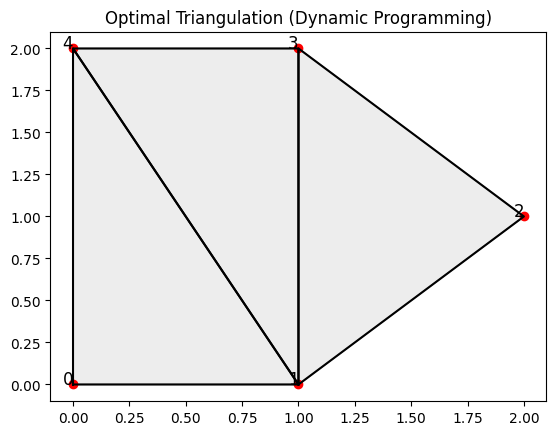

Total possible triangulations: 5
[((0, 2),), ((0, 3),), ((1, 3),), ((1, 4),), ((2, 4),)]


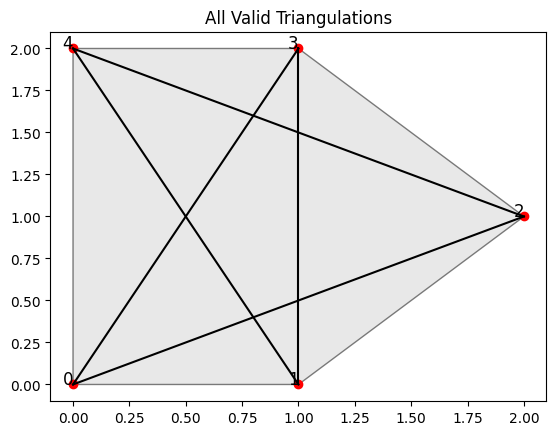

In [5]:
test([(0, 0), (1, 0), (2, 1), (1, 2), (0, 2)])  # Test case 1

Minimum cost of triangulation: 41.5463
Optimal Triangles: [(0, 1, 4), (1, 2, 4), (2, 3, 4)]


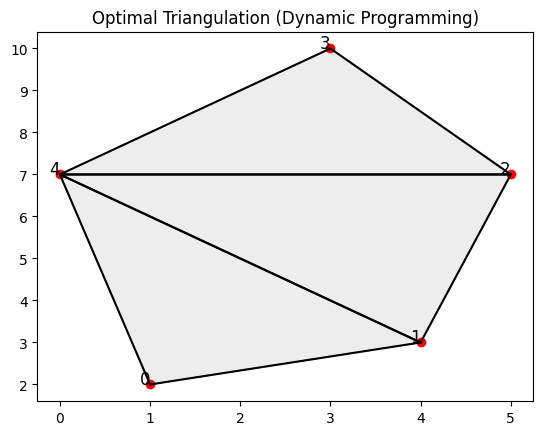

Total possible triangulations: 5
[((0, 2),), ((0, 3),), ((1, 3),), ((1, 4),), ((2, 4),)]


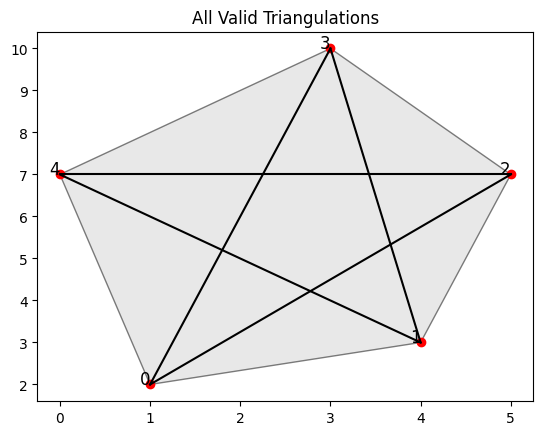

In [6]:
test([(1, 2), (4, 3), (5, 7), (3, 10), (0, 7)])